# Analysis

1. CNN and Fox News had the most negative Vader sentiment analysis.
2. The New York Times had a slightly negative score of -0.02. Even though its score is slightly negative, the New York Times had the scores closes to zero. It is the news outlet with the closest to neutral sentiment.
3. While both the BBC and CBS had an overall positive Vader scores CBS had the highest score with 0.2. the BBC had 0.09.
4. The validity of the Vader analysis is questionable. There are tweets of negative events that have neutral Vader scores instead of expected negative Vader scores.
5. The Vader analysis on news organizations is highly dependent on the type of news happens on a particular day. A more fair analysis would analyze a larger sample of tweets over a larger period of time.

In [1]:
#Dependencies.

import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#Twitter API keys

consumer_key = "4JPyi4nFzwCJTxf2M6WzKj1xe"
consumer_secret = "JK62tMorfWHYRTQyJggN6JJSra4MHag6h7QLolvWtMVrZ1h0cy"
access_token = "27365820-SLlpBaUtl0ITSCZe9Tdm6nCzpe3Quc4ZPsKyjyDUV"
access_token_secret = "L54XxUoSjFnLsXd0zDHfG57ziW2hE5PmdOm0OLmA3D47z"

In [4]:
# Setup Tweepy API Authentication.

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
#Get tweets from each news organization's twitter feeds.



# A list to hold sentiments.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1


In [6]:
#Create DataFrame.

news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,-0.7430,Sun Nov 05 22:27:18 +0000 2017,0.247,0.701,0.052,RT @BBCSport: Some sad news to bring you.\n\nF...,0,@BBC
1,-0.7351,Sun Nov 05 21:32:03 +0000 2017,0.267,0.733,0.000,"🤦😂 @LiamPayne &amp; @gregjames, a fake moustac...",1,@BBC
2,0.5574,Sun Nov 05 20:49:53 +0000 2017,0.000,0.825,0.175,RT @BBCOne: Q: How many tickles does it take t...,2,@BBC
3,0.3818,Sun Nov 05 20:47:59 +0000 2017,0.109,0.714,0.176,RT @bbcstrictly: That shock result has left us...,3,@BBC
4,0.2732,Sun Nov 05 20:46:18 +0000 2017,0.000,0.826,0.174,"RT @BBCTwo: Well, you don't see that every day...",4,@BBC
5,0.4404,Sun Nov 05 20:46:10 +0000 2017,0.000,0.707,0.293,RT @BBCOne: Can’t beat a good accessory. 👑 #Bl...,5,@BBC
6,0.5574,Sun Nov 05 20:46:01 +0000 2017,0.000,0.825,0.175,RT @BBCPanorama: Watch our #paradisepapers inv...,6,@BBC
7,-0.6705,Sun Nov 05 20:08:11 +0000 2017,0.191,0.809,0.000,RT @BBCBreaking: At least 27 people killed in ...,7,@BBC
8,0.0000,Sun Nov 05 19:35:03 +0000 2017,0.000,1.000,0.000,🎥 @LouisTheroux meets disaffected former membe...,8,@BBC
9,-0.4215,Sun Nov 05 19:02:04 +0000 2017,0.203,0.797,0.000,When your other half cheats on you with #Stran...,9,@BBC


In [7]:
#Export the DataFrame to as csv.

news_sentiments.to_csv("Twitter_News_Mood.csv", index=False)

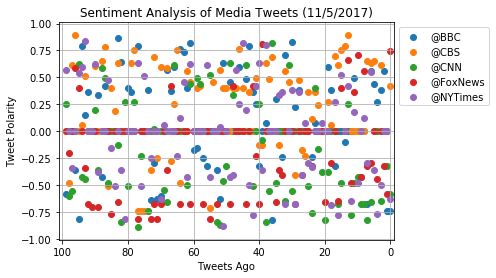

In [8]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (11/5/2017)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [9]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.088186
@CBS        0.203394
@CNN       -0.150960
@FoxNews   -0.147275
@NYTimes   -0.017520
Name: Compound, dtype: float64

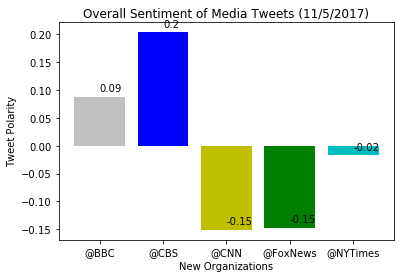

In [10]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Media Tweets (11/5/2017)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()